## **Setting Up Keras**
To get started with Keras, you need to install it using pip:

In [ ]:
!pip install keras

Additionally, Keras runs on top of backend engines like TensorFlow, Theano, or CNTK. We will use TensorFlow in our examples.

## **Basic Keras Model: Sequential and Functional APIs**

Keras provides two main types of models:

1. **Sequential API**: A simple stack of layers connected sequentially.
2. **Functional API**: A more flexible way to define models, allowing for multi-input, multi-output, and shared layers.

## **Building Your First ANN with Keras**

**Title: Building Your First ANN with Keras**

Welcome! Let's dive into building our first Artificial Neural Network (ANN) using the Keras framework and the MNIST dataset. MNIST is a well-known dataset that contains 70,000 images of handwritten digits, split into 60,000 training images and 10,000 test images. Each image is 28x28 pixels.

**Step-by-Step Guide**

**1. Importing Necessary Libraries**

First, we need to import the required libraries. Keras provides built-in functions to load the MNIST dataset and utilities for model building.

In [ ]:
from keras.datasets import mnist  # Dataset
from keras.models import Sequential  # Model type
from keras.layers import Dense, Flatten  # Layers
from keras.utils import to_categorical  # Utility for categorical conversion
import numpy as np
import matplotlib.pyplot as plt

**2. Loading the MNIST Dataset**

We load the dataset using `mnist.load_data()`. This function returns two tuples: one for training data and another for testing data.

In [ ]:
mnist.load_data()[0][0][1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         54, 227, 253, 252, 239, 233, 252,  57,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,  60,
        224, 252, 253, 252, 202,  84, 252, 253, 122,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 163, 252,
        252, 252, 253, 252, 252,  96, 189, 253, 167,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 238, 253,
        253, 190, 114, 253, 228,  47,  79, 255, 168,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238, 252, 252,
        179,  12,  75, 121,  21,   0,   0, 253, 243,  50,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  38, 165, 253, 233, 208,
         84,   0,   0,   0,   0,   0,   0, 253, 252, 165,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   7, 178, 252, 240,  71,  19,
         28,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  57, 252, 252,  63,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 198, 253, 190,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 255, 253, 196,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  76, 246, 252, 112,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 148,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 230,  25,   0,   0,   0,
          0,   0,   0,   0,   0,   7, 135, 253, 186,  12,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 223,   0,   0,   0,   0,
          0,   0,   0,   0,   7, 131, 252, 225,  71,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 145,   0,   0,   0,   0,
          0,   0,   0,  48, 165, 252, 173,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  86, 253, 225,   0,   0,   0,   0,
          0,   0, 114, 238, 253, 162,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 249, 146,  48,  29,  85,
        178, 225, 253, 223, 167,  56,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 252, 252, 229, 215, 252,
        252, 252, 196, 130,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  28, 199, 252, 252, 253, 252, 252,
        233, 145,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  25, 128, 252, 253, 252, 141,
         37,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
# def plot_images(images, true_labels, predicted_labels, num_images=10):
#     plt.figure(figsize=(15, 5))
#     for i in range(num_images):
#         plt.subplot(2, num_images // 1, i + 1)
#         plt.imshow(images[i], cmap='gray')
#         plt.title(f"True: {np.argmax(true_labels[i])}\nPred: {np.argmax(predicted_labels[i])}")
#         plt.axis('off')
#     plt.show()

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
len(x_train)

60000

In [ ]:
lst = [1,2,3,4,5,6]

lst[-3:]

[4, 5, 6]

In [ ]:
x_val = x_train[-10000:]
y_val = y_train[-10000:]

x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [ ]:
model.fit(x_train, y_train, batch_size=128, epochs=8, validation_data(x_))

SyntaxError: positional argument follows keyword argument (<ipython-input-39-66bad7b51b85>, line 1)

TypeError: Invalid shape (28,) for image data

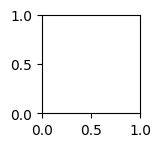

In [ ]:
# x_test_reshaped = x_test.reshape((x_test.shape[0], 28, 28))

# plot_images(x_test_reshaped, y_test, predictions, num_images=10)

# plot_images(x_train[0],y_test[0], y_test[0], num_images=10)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

**3. Preprocessing the Data**

Before feeding the data into our model, we need to preprocess it:

  - **Reshape the data**: Convert the 28x28 images into a flat array of 784 pixels (28 * 28).
  - **Normalize the data**: Scale pixel values to the range [0, 1].
  - **Convert labels to categorical**: Transform the labels into a one-hot encoded format.

In [ ]:
x_train = x_train.reshape((x_train.shape[0], 28*28)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28*28)).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

**4. Defining the Model**

We will use the Sequential API to define our model. Our model will have:

* An input layer with 784 neurons (one for each pixel).
* One hidden layer with 512 neurons and ReLU activation function.
* An output layer with 10 neurons (one for each digit) and softmax activation function.

In [ ]:
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(28*28,)))
model.add(Dense(units=10, activation='softmax'))


**5. Compiling the Model**

Next, we compile the model. This step configures the learning process. We specify:

* **Loss function**: 'categorical_crossentropy' for multi-class classification.
* **Optimizer**: 'adam', which is an efficient gradient descent algorithm.
* **Metrics**: 'accuracy' to track during training and testing.

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Define the model
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(28*28,)))
model.add(Dense(units=10, activation='softmax'))

**6. Training the Model**

We train the model using the fit method. We need to specify:

* **Training data**: x_train and y_train.
* **Number of epochs**: How many times the model will see the entire dataset (we'll use 10).
* **Batch size**: Number of samples per gradient update (we'll use 128).
* **Validation split**: Fraction of the training data to be used as validation data (we'll use 20%).

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

model.fit()

Epoch 1/10
375/375 [==============================] - 7s 17ms/step - loss: 0.2953 - accuracy: 0.9167 - val_loss: 0.1611 - val_accuracy: 0.9543
Epoch 2/10
375/375 [==============================] - 5s 13ms/step - loss: 0.1230 - accuracy: 0.9638 - val_loss: 0.1112 - val_accuracy: 0.9657
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0787 - accuracy: 0.9770 - val_loss: 0.1002 - val_accuracy: 0.9683
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0556 - accuracy: 0.9842 - val_loss: 0.0860 - val_accuracy: 0.9730
Epoch 5/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0408 - accuracy: 0.9886 - val_loss: 0.0776 - val_accuracy: 0.9756
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0298 - accuracy: 0.9918 - val_loss: 0.0789 - val_accuracy: 0.9762
Epoch 7/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0220 - accuracy: 0.9945 - val_loss: 0.0760 - val_accuracy: 0.9764

This output shows the training process of our neural network over 10 epochs. Each epoch represents one complete pass through the entire training dataset. Let's break down the key parts of the output:

### Epoch and Iterations
- **Epoch 1/10**: Indicates the first epoch out of 10.
- **375/375 [==============================]**: Shows the number of batches processed out of the total batches (375 in this case).

### Training Metrics
- **loss**: The training loss (0.2982 for the first epoch). Lower values indicate a better fit to the training data.
- **accuracy**: The training accuracy (0.9157 for the first epoch). This is the percentage of correctly classified samples in the training set.

### Validation Metrics
- **val_loss**: The validation loss (0.1535 for the first epoch). This measures the model's performance on the validation set. Lower values indicate a better fit.
- **val_accuracy**: The validation accuracy (0.9560 for the first epoch). This is the percentage of correctly classified samples in the validation set.

### Progress Over Epochs
- As the epochs progress from 1 to 10, we observe the following trends:
  - **Training loss decreases**: From 0.2982 to 0.0097, indicating the model is learning and fitting the training data better.
  - **Training accuracy increases**: From 91.57% to 99.77%, indicating improved performance on the training set.
  - **Validation loss and accuracy**: The validation loss fluctuates but generally decreases, while the validation accuracy increases, indicating that the model is generalizing well to unseen data.

### Conclusion
- The final training accuracy of 99.77% and validation accuracy of 97.78% indicate that the model performs very well on both training and validation sets.
- The difference between training and validation metrics should be monitored to ensure the model is not overfitting. Here, the metrics suggest the model is well-generalized.

**7. Evaluating the Model**

After training, we evaluate the model on the test dataset to see how well it generalizes to new data.

In [ ]:
score = model.evaluate(x_test, y_test)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0684 - accuracy: 0.9799
Test loss: 0.0684211477637291 / Test accuracy: 0.9799000024795532


**8. Making Predictions**

We use the trained model to make predictions on the test set.

In [ ]:
# Make predictions
predictions = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


**9. Function to Plot Images**

This function plots a given number of images along with their true and predicted labels.

In [ ]:
def plot_images(images, true_labels, predicted_labels, num_images=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"True: {np.argmax(true_labels[i])}\nPred: {np.argmax(predicted_labels[i])}")
        plt.axis('off')
    plt.show()

**11. Reshaping the Test Data for Display**

We reshape the test data back to 28x28 pixels for visualization.

In [ ]:
x_test_reshaped = x_test.reshape((x_test.shape[0], 28, 28))

**12. Plotting the Images**

We call the plot_images function to display the first 10 test images along with their true and predicted labels.

This code will display the images and allow you to compare the predicted labels with the actual labels, providing a visual understanding of the model's performance.








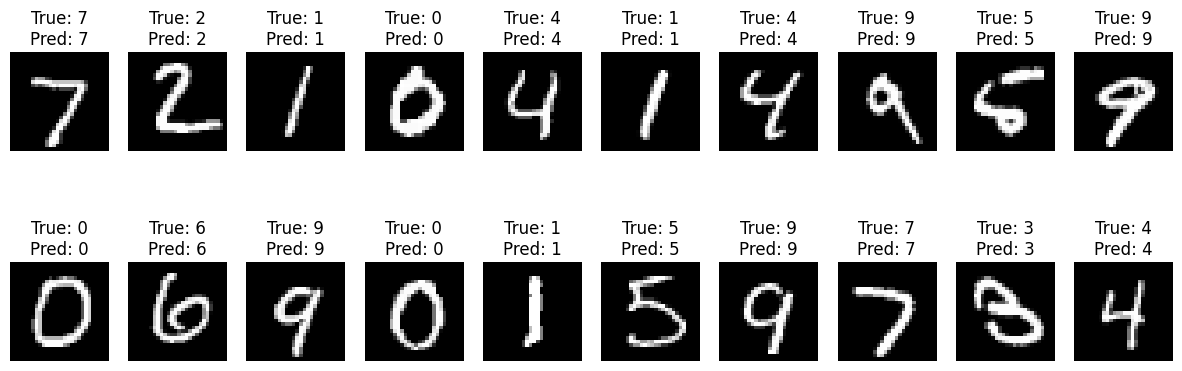

In [ ]:
plot_images(x_test_reshaped, y_test, predictions, num_images=20)

In [ ]:
import tensorflow as tf

In [ ]:
tf.data.Dataset().range(5)

TypeError: Can't instantiate abstract class DatasetV2 with abstract methods _inputs, element_spec